# Task 6.2

## Graph plotting 
## Correlation of data frame
## Heatmaps

In [9]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [10]:
df = pd.read_csv(r"C:\Users\thoms\Desktop\Data Analytics\Achievement 6\Rental Car\02. Data\Original Data\CarRentalDataV1.csv")

In [11]:
matplotlib.__version__

'3.4.3'

In [12]:
%matplotlib inline

In [38]:
# define path

path = r"C:\Users\thoms\Desktop\Data Analytics\Achievement 6\Rental Car\02. Data\Prepared Data"

In [14]:
# Check data frame Correlation

df.corr()

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
rating,1.000000,-0.054741,-0.040075,-0.000952,-0.017403,0.049062,0.089847,0.111056
renterTripsTaken,-0.054741,1.000000,0.994196,0.007248,-0.051644,-0.332409,-0.104189,-0.120417
reviewCount,-0.040075,0.994196,1.000000,0.004176,-0.045809,-0.326240,-0.100230,-0.108578
location.latitude,-0.000952,0.007248,0.004176,1.000000,-0.007440,0.003206,-0.007383,-0.026320
location.longitude,-0.017403,-0.051644,-0.045809,-0.007440,1.000000,0.021864,0.058480,0.018183
owner.id,0.049062,-0.332409,-0.326240,0.003206,0.021864,1.000000,-0.012344,0.096656
rate.daily,0.089847,-0.104189,-0.100230,-0.007383,0.058480,-0.012344,1.000000,0.056004
vehicle.year,0.111056,-0.120417,-0.108578,-0.026320,0.018183,0.096656,0.056004,1.000000


In [15]:
# Find duplicates

df_dups = df[df.duplicated()]

In [16]:
df_dups.shape

(0, 16)

In [17]:
# Checking for no information

df.isnull().sum()

fuelType                0
rating                490
renterTripsTaken        0
reviewCount             0
location.city           0
location.country        0
location.latitude       0
location.longitude      0
location.state          0
owner.id                0
rate.daily              0
vehicle.make            0
vehicle.model           0
vehicle.type            0
vehicle.year            0
airportcity             0
dtype: int64

In [18]:
# Rename columns

df.rename(columns = {'fuelType':'fuel.type', 'renterTripsTaken':'renter.trips.taken', 'reviewCount':'review.count', 'airportcity' : 'airport.city' }, inplace = True)


In [19]:
df.loc[(df!=0).any(axis=1)]


,fuel.type,rating,renter.trips.taken,review.count,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airport.city
0,ELECTRIC,5.00,13,12,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,Albuquerque
1,ELECTRIC,5.00,2,1,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,Albuquerque
2,HYBRID,4.92,28,24,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,Albuquerque
3,GASOLINE,5.00,21,20,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,Albuquerque
4,GASOLINE,5.00,3,1,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,GASOLINE,5.00,32,27,Honolulu,US,21.292950,-157.836856,HI,9794111,33,Chevrolet,Cruze,car,2017,Honolulu
5772,HYBRID,5.00,17,16,Aiea,US,21.375507,-157.914919,HI,2754690,49,Lexus,HS 250h,car,2010,Honolulu
5773,GASOLINE,4.94,18,17,Kailua,US,21.378719,-157.727816,HI,11313508,35,smart,fortwo,car,2013,Honolulu
5774,GASOLINE,NaN,1,0,Waipahu,US,21.376105,-158.020237,HI,4209883,77,GMC,Savana,van,2015,Honolulu


In [20]:
df=df.mask(df==0).fillna(df.mean())


C:\Users\thoms\AppData\Local\Temp/ipykernel_12888/273691968.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.mask(df==0).fillna(df.mean())


In [21]:
df.isnull().sum()

fuel.type             0
rating                0
renter.trips.taken    0
review.count          0
location.city         0
location.country      0
location.latitude     0
location.longitude    0
location.state        0
owner.id              0
rate.daily            0
vehicle.make          0
vehicle.model         0
vehicle.type          0
vehicle.year          0
airport.city          0
dtype: int64

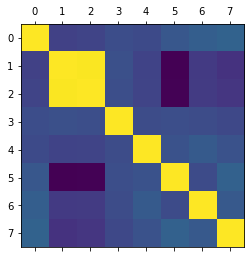

In [22]:
# Plot correlation heatmap


plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

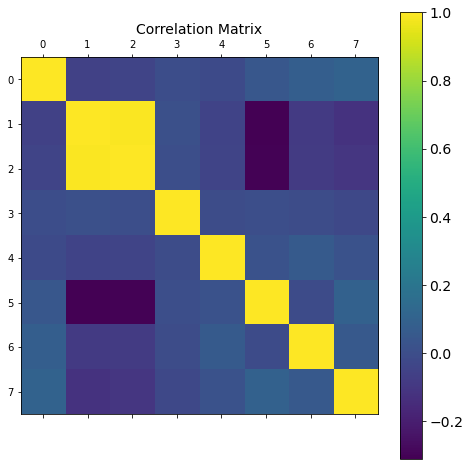

In [23]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [24]:
df.columns

Index(['fuel.type', 'rating', 'renter.trips.taken', 'review.count',
       'location.city', 'location.country', 'location.latitude',
       'location.longitude', 'location.state', 'owner.id', 'rate.daily',
       'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year',
       'airport.city'],
      dtype='object')

In [25]:
# Create Sub 

sub = df [['fuel.type', 'rating', 'renter.trips.taken', 'review.count',
       'location.city', 'location.country', 'location.latitude',
       'location.longitude', 'location.state', 'owner.id', 'rate.daily',
       'vehicle.make', 'vehicle.model', 'vehicle.type', 'vehicle.year',
       'airport.city']]

In [26]:
sub

,fuel.type,rating,renter.trips.taken,review.count,location.city,location.country,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year,airport.city
0,ELECTRIC,5.000000,13.0,12.000000,Seattle,US,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019,Albuquerque
1,ELECTRIC,5.000000,2.0,1.000000,Tijeras,US,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018,Albuquerque
2,HYBRID,4.920000,28.0,24.000000,Albuquerque,US,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012,Albuquerque
3,GASOLINE,5.000000,21.0,20.000000,Albuquerque,US,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018,Albuquerque
4,GASOLINE,5.000000,3.0,1.000000,Albuquerque,US,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010,Albuquerque
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,GASOLINE,5.000000,32.0,27.000000,Honolulu,US,21.292950,-157.836856,HI,9794111,33,Chevrolet,Cruze,car,2017,Honolulu
5772,HYBRID,5.000000,17.0,16.000000,Aiea,US,21.375507,-157.914919,HI,2754690,49,Lexus,HS 250h,car,2010,Honolulu
5773,GASOLINE,4.940000,18.0,17.000000,Kailua,US,21.378719,-157.727816,HI,11313508,35,smart,fortwo,car,2013,Honolulu
5774,GASOLINE,4.920475,1.0,28.599377,Waipahu,US,21.376105,-158.020237,HI,4209883,77,GMC,Savana,van,2015,Honolulu


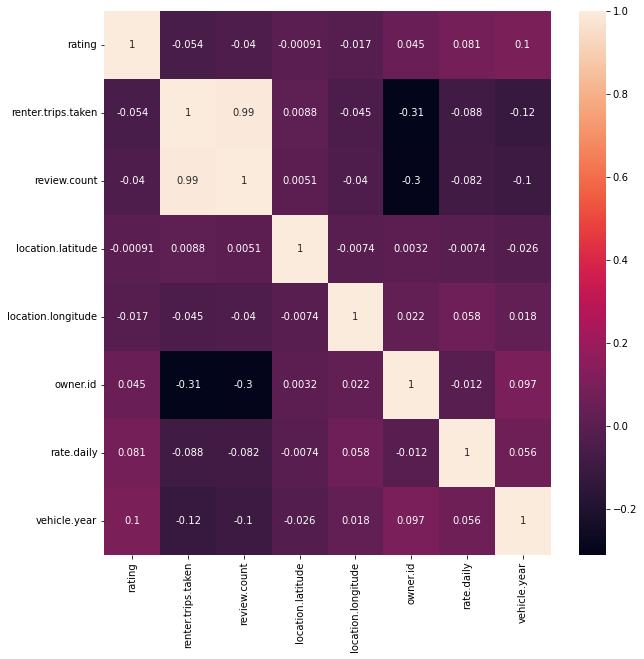

In [27]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

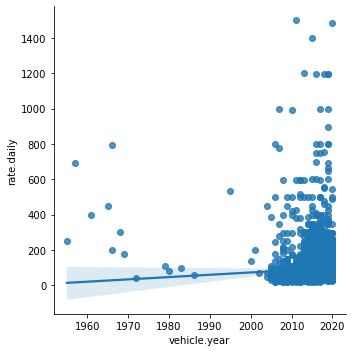

In [28]:
# Create scatterplot


sns.lmplot(x = 'vehicle.year', y = 'rate.daily', data = df)

In [29]:
sub_2 = sub[[ 'rating', 'renter.trips.taken', 'review.count', 'owner.id', 'rate.daily', 'vehicle.year']]

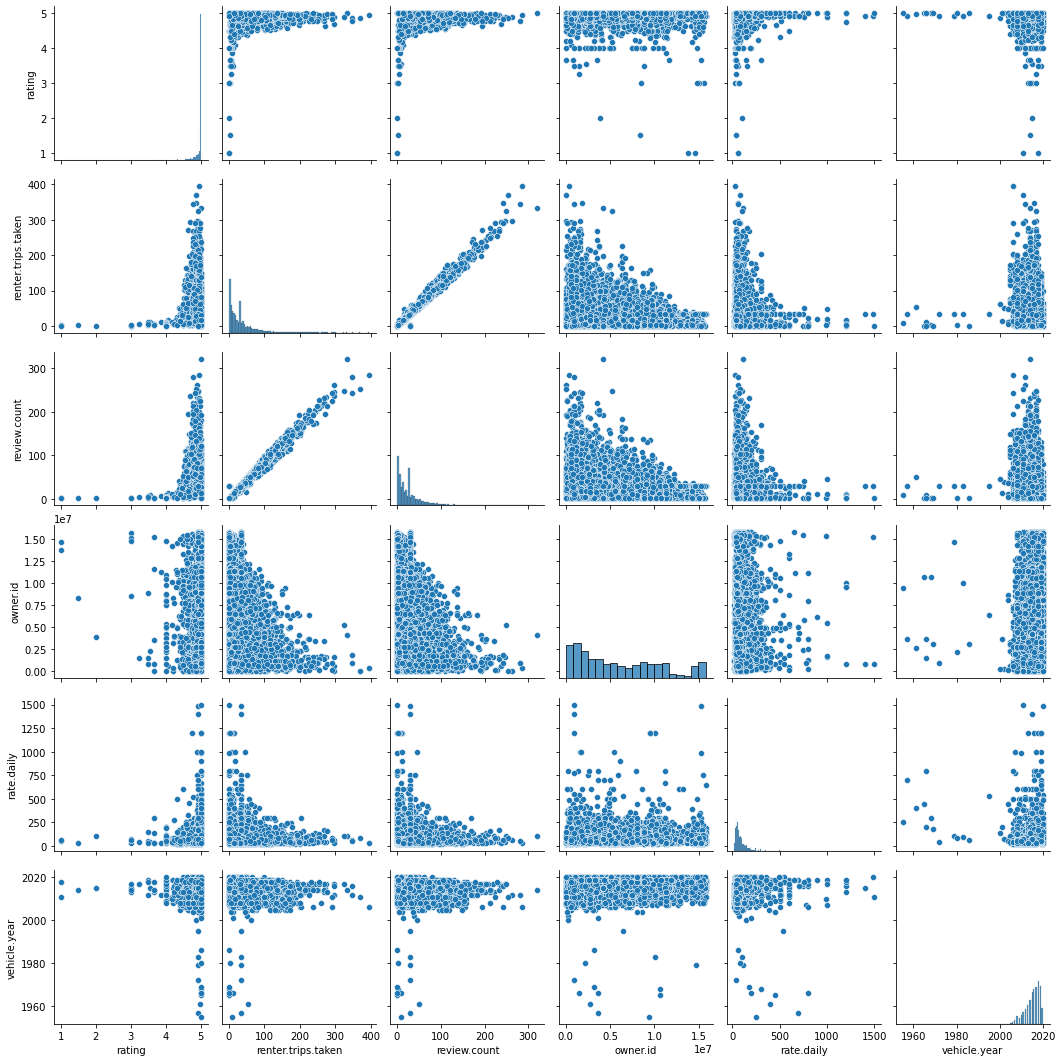

In [30]:
g = sns.pairplot(sub_2)

<AxesSubplot:xlabel='rate.daily', ylabel='Count'>

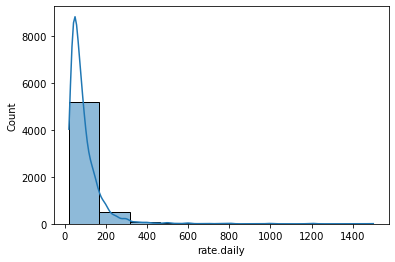

In [31]:
sns.histplot(df['rate.daily'], bins = 10, kde = True)

In [32]:
df.loc[df['rate.daily'] < 45, 'rate category'] = 'Low rate'

In [33]:
df.loc[(df['rate.daily'] >= 45) & (df['rate.daily'] < 100), 'rate category']  = 'average rate'

In [34]:
df.loc[df['rate.daily'] < 100, 'rate category'] = 'High rate'

In [35]:
df['rate.daily'].value_counts(dropna = False)

35     159
45     140
49     133
40     125
50     116
      ... 
196      1
899      1
650      1
535      1
699      1
Name: rate.daily, Length: 291, dtype: int64

<AxesSubplot:xlabel='vehicle.year', ylabel='rate.daily'>

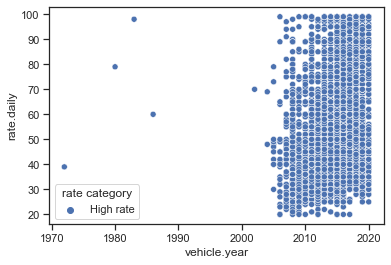

In [36]:
sns.set(style="ticks")
sns.scatterplot(x="vehicle.year", y="rate.daily", hue="rate category", data=df)

## Questions:

### Does the dailty rate and year of car have an effect?
### Does city have an effect on rental rate?
### Does rental trip take change the rental rate?

In [39]:
df.to_csv(os.path.join(path, 'car_rental_data.csv'))